<a href="https://colab.research.google.com/github/Aya-Amin/Face-recognition/blob/master/DataLoad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Loading

#### Extracting the images from the Zip File

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1lAiosEECRFcWvc2rIEPbIe62YmCSSEI2'
fluff, id = link.split('=')
print (id) 
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('att_faces.zip')


1lAiosEECRFcWvc2rIEPbIe62YmCSSEI2


In [0]:
from zipfile import ZipFile 
  
zip_ref = ZipFile('att_faces.zip', 'r')
zip_ref.extractall('att_faces/')
zip_ref.close()

#### Loading the Extracted Images 

In [0]:
from matplotlib import pyplot
data = []
for i in range(1 , 41):
    folder = str(i)
    for j in range(1,11):
        file = str(j)
        data.append(pyplot.imread('att_faces/'+'s'+folder+'/'+file +'.pgm'))
    
    



#### Reshaping all the images into 10304x1 vectors

In [0]:
for i in range(0 , 400):
    data[i] = data[i].reshape(10304)
print(data)

[array([48, 49, 45, ..., 47, 46, 46], dtype=uint8), array([60, 60, 62, ..., 32, 34, 34], dtype=uint8), array([39, 44, 53, ..., 29, 26, 29], dtype=uint8), array([63, 53, 35, ..., 41, 10, 24], dtype=uint8), array([64, 76, 80, ..., 35, 37, 39], dtype=uint8), array([ 43,  50,  41, ..., 158, 153, 169], dtype=uint8), array([41, 47, 47, ..., 35, 37, 38], dtype=uint8), array([44, 43, 32, ..., 43, 43, 37], dtype=uint8), array([42, 41, 44, ..., 42, 43, 41], dtype=uint8), array([34, 34, 33, ..., 37, 40, 33], dtype=uint8), array([ 35,  36,  37, ..., 144, 147, 143], dtype=uint8), array([37, 35, 35, ..., 26, 28, 28], dtype=uint8), array([30, 37, 35, ..., 26, 27, 32], dtype=uint8), array([34, 36, 35, ..., 32, 25, 25], dtype=uint8), array([35, 32, 36, ..., 25, 28, 29], dtype=uint8), array([34, 35, 35, ..., 31, 24, 24], dtype=uint8), array([ 38,  35,  36, ..., 138, 142, 141], dtype=uint8), array([ 34,  39,  35, ..., 135, 138, 148], dtype=uint8), array([ 43,  39,  36, ..., 154, 155, 141], dtype=uint8), 

### constructin a matrix for all images, each image in a row

In [0]:
import numpy as np
df = np.array(data)
print(df.shape)
print(df)

(400, 10304)
[[ 48  49  45 ...  47  46  46]
 [ 60  60  62 ...  32  34  34]
 [ 39  44  53 ...  29  26  29]
 ...
 [125 119 124 ...  36  39  40]
 [119 120 120 ...  89  94  85]
 [125 124 124 ...  36  35  34]]


### Generating the Labels

In [0]:
labels = []
for i in range(1,41):
    for j in range(1,11):
        labels.append(i)
print(labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 28, 28, 2

### Checking an image sample

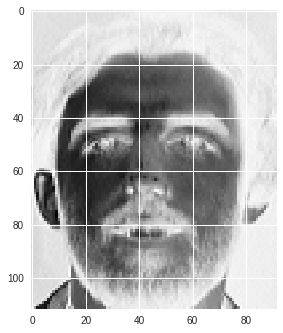

In [0]:
pyplot.imshow(data[100].reshape(112 , 92))

### Splitting the data into training set and testing set

In [0]:
X_train = np.array(data)[list(range(0,400,2)),:]
Y_train = np.array(labels)[list(range(0,400,2))]

X_test = np.array(data)[list(range(1,400,2)),:]
Y_test = np.array(labels)[list(range(1,400,2))]
print(Y_train)

[ 1  1  1  1  1  2  2  2  2  2  3  3  3  3  3  4  4  4  4  4  5  5  5  5
  5  6  6  6  6  6  7  7  7  7  7  8  8  8  8  8  9  9  9  9  9 10 10 10
 10 10 11 11 11 11 11 12 12 12 12 12 13 13 13 13 13 14 14 14 14 14 15 15
 15 15 15 16 16 16 16 16 17 17 17 17 17 18 18 18 18 18 19 19 19 19 19 20
 20 20 20 20 21 21 21 21 21 22 22 22 22 22 23 23 23 23 23 24 24 24 24 24
 25 25 25 25 25 26 26 26 26 26 27 27 27 27 27 28 28 28 28 28 29 29 29 29
 29 30 30 30 30 30 31 31 31 31 31 32 32 32 32 32 33 33 33 33 33 34 34 34
 34 34 35 35 35 35 35 36 36 36 36 36 37 37 37 37 37 38 38 38 38 38 39 39
 39 39 39 40 40 40 40 40]


## Data Preprocessing

#### Subtracting the mean

In [0]:
import numpy as np
mean = np.array([np.mean(X_train, axis = 0)])
print(mean)


[[86.115 86.265 86.685 ... 76.5   77.395 77.085]]


In [0]:
Z_train = X_train - mean


print(Z_train)

[[-38.115 -37.265 -41.685 ... -29.5   -31.395 -31.085]
 [-47.115 -42.265 -33.685 ... -47.5   -51.395 -48.085]
 [-22.115 -10.265  -6.685 ... -41.5   -40.395 -38.085]
 ...
 [ 41.885  38.735  38.315 ...   8.5    12.605   6.915]
 [ 42.885  40.735  46.315 ...  16.5    15.605  15.915]
 [ 32.885  33.735  33.315 ...  12.5    16.605   7.915]]


In [0]:
cov_matrix = np.matmul(Z_train.T,Z_train)/200
print(cov_matrix)

[[1241.511775 1237.489525 1220.456225 ...  -69.8075    -99.755425
   -43.884775]
 [1237.489525 1250.244775 1227.058475 ...  -81.5325   -110.499675
   -55.222525]
 [1220.456225 1227.058475 1222.145775 ...  -79.0825   -114.060575
   -67.653225]
 ...
 [ -69.8075    -81.5325    -79.0825   ... 1894.       1865.0575
  1682.5425  ]
 [ -99.755425 -110.499675 -114.060575 ... 1865.0575   1970.238975
  1809.101425]
 [ -43.884775  -55.222525  -67.653225 ... 1682.5425   1809.101425
  1888.737775]]


###### For the validation the the Cov_matrix is correctly computers

In [0]:
cov_matrix = np.cov(X_train,rowvar = False,bias = True)
print(cov_matrix)

[[1241.511775 1237.489525 1220.456225 ...  -69.8075    -99.755425
   -43.884775]
 [1237.489525 1250.244775 1227.058475 ...  -81.5325   -110.499675
   -55.222525]
 [1220.456225 1227.058475 1222.145775 ...  -79.0825   -114.060575
   -67.653225]
 ...
 [ -69.8075    -81.5325    -79.0825   ... 1894.       1865.0575
  1682.5425  ]
 [ -99.755425 -110.499675 -114.060575 ... 1865.0575   1970.238975
  1809.101425]
 [ -43.884775  -55.222525  -67.653225 ... 1682.5425   1809.101425
  1888.737775]]


#### Computing the EigenVectors and EigenValues

In [0]:
eigenvalues , eigenvectors = np.linalg.eigh(cov_matrix)

print(eigenvalues)
print(eigenvectors)

[-1.71819601e-09 -1.42148715e-09 -9.41235467e-10 ...  1.14824189e+06
  2.01725036e+06  2.89336806e+06]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  2.05577118e-02
   1.36115565e-02 -2.81623260e-03]
 [-3.37920257e-01  4.52150116e-01  4.75958495e-02 ...  2.05184388e-02
   1.37237246e-02 -2.78538278e-03]
 [ 4.94730169e-02 -1.05208112e-01 -4.70400229e-01 ...  2.03021295e-02
   1.37554242e-02 -2.55134713e-03]
 ...
 [-1.11038767e-03  7.02351385e-03 -6.89310945e-03 ...  1.55841311e-02
  -1.15193602e-02 -5.43460327e-03]
 [ 2.51880157e-02  1.85915000e-02  1.07597349e-02 ...  1.48120497e-02
  -1.18352602e-02 -5.55782224e-03]
 [-1.87451999e-02 -1.88790113e-02 -2.32890316e-04 ...  1.52494977e-02
  -1.08773831e-02 -6.28803778e-03]]


In [0]:
np.savetxt('eigenVectors.csv',eigenvectors)

In [0]:
eigenvectors.shape

(10304, 10304)

#### Sorting the eigneValues and EgienVectors accordingly.

In [0]:
sev = eigenvalues.argsort()[::-1] #returns the indices one would use to sort the array.
eigenvalues = eigenvalues[sev]
eigenvectors = eigenvectors[:,sev]
print(eigenvalues)
print(eigenvectors)


[ 2.89336806e+06  2.01725036e+06  1.14824189e+06 ... -9.41235467e-10
 -1.42148715e-09 -1.71819601e-09]
[[-2.81623260e-03  1.36115565e-02  2.05577118e-02 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-2.78538278e-03  1.37237246e-02  2.05184388e-02 ...  4.75958495e-02
   4.52150116e-01 -3.37920257e-01]
 [-2.55134713e-03  1.37554242e-02  2.03021295e-02 ... -4.70400229e-01
  -1.05208112e-01  4.94730169e-02]
 ...
 [-5.43460327e-03 -1.15193602e-02  1.55841311e-02 ... -6.89310945e-03
   7.02351385e-03 -1.11038767e-03]
 [-5.55782224e-03 -1.18352602e-02  1.48120497e-02 ...  1.07597349e-02
   1.85915000e-02  2.51880157e-02]
 [-6.28803778e-03 -1.08773831e-02  1.52494977e-02 ... -2.32890316e-04
  -1.88790113e-02 -1.87451999e-02]]


##### Another method for sorting 

In [0]:
eigPairs = list()

for i in range (0, len(eigenvalues)):
    eigPairs.append([ np.abs(eigenvalues[i]), eigenvectors[:,i] ])

print(len(eigPairs))
print('\n')
print(eigPairs)


10304


[[2893368.0588590573, array([-0.00281623, -0.00278538, -0.00255135, ..., -0.0054346 ,
       -0.00555782, -0.00628804])], [2017250.3577155443, array([ 0.01361156,  0.01372372,  0.01375542, ..., -0.01151936,
       -0.01183526, -0.01087738])], [1148241.8879828262, array([0.02055771, 0.02051844, 0.02030213, ..., 0.01558413, 0.01481205,
       0.0152495 ])], [944172.3027013851, array([-0.01134567, -0.01160711, -0.01139155, ...,  0.01083789,
        0.01188781,  0.01148483])], [795361.1159389657, array([ 0.00400554,  0.00396198,  0.00393171, ..., -0.00395136,
       -0.00412239, -0.00375123])], [559769.1583129575, array([-0.00307787, -0.0025224 , -0.00271013, ..., -0.00180478,
       -0.00134231, -0.0015836 ])], [420233.6107224898, array([0.01056541, 0.01093323, 0.01045838, ..., 0.00219004, 0.00225297,
       0.00116447])], [386315.2781703441, array([-0.00114141, -0.00060801, -0.00071143, ...,  0.00558648,
        0.00761367,  0.00801745])], [321708.60105688847, array([ 0.00471912,

In [0]:
def sortKey(myList):
  return myList[0]

eigPairs.sort(key = sortKey, reverse = True)

print(eigPairs[3][1])

[-0.01134567 -0.01160711 -0.01139155 ...  0.01083789  0.01188781
  0.01148483]


In [0]:
values = []
for i in range(0,10304):
  values.append(eigPairs[i][0])

print(values)

[2893368.0588590573, 2017250.3577155443, 1148241.8879828262, 944172.3027013851, 795361.1159389657, 559769.1583129575, 420233.6107224898, 386315.2781703441, 321708.60105688847, 309539.91357787454, 257476.86936968126, 231858.43690995828, 188794.31406653975, 177123.79223489066, 165009.4318105646, 156762.0616083228, 149801.84205690396, 137720.05988785808, 125845.54813658673, 121975.8370820195, 114181.01203234449, 110597.5955901418, 106839.7120237149, 103885.45451038287, 98654.74860233266, 86235.3642560287, 84839.07604054881, 83896.74134625761, 79641.23809608439, 78990.55503024685, 72100.23035035885, 71143.63603796677, 69391.12264808525, 67554.41847020436, 65098.48968719723, 63935.082144722546, 61657.41524792561, 60200.474552930114, 57498.36322793025, 55028.14763601587, 53755.55872441311, 52846.10906668263, 50475.431711392885, 50328.5245608106, 48973.09759985823, 45780.34307879183, 45460.111598740055, 44642.84706407447, 42334.22150284655, 41912.99464456935, 41760.33207487601, 40272.42922289

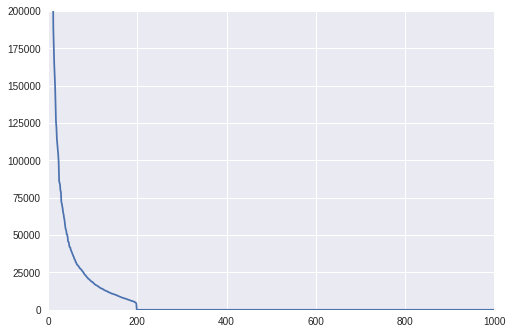

In [0]:
from matplotlib import pyplot as py

py.plot(range(0,1000),values[0:1000] )
py.axis([0,1000,0,200000])
py.show()

### Plotting the Eigenvalues 

###### Plotting the first 1000 EigenValues

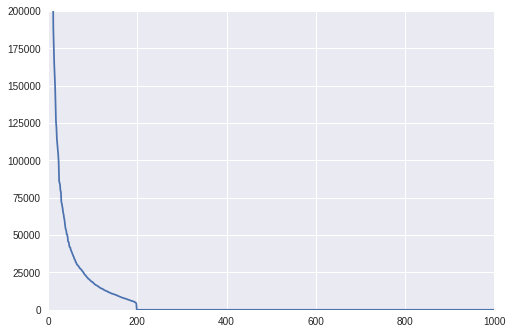

In [0]:
from matplotlib import pyplot as py

py.plot(range(0,1000),eigenvalues[0:1000] )
py.axis([0,1000,0,200000])
py.show()

##### As seen, the first 200 Eigenvalues are the most important, the next are almost zeros

### Deciding how many Eigenvectors shall be taken as new_features


#### Based on Eplained Variance for each eigenvalue






##### Claculating and plotting  the variance explained for  the first 200 Egienvectors

In [0]:
total_variance = np.sum(eigenvalues)
print(total_variance)
list_variance = []
sum = 0
for i in range(0,200):
  sum +=eigenvalues[i]
  list_variance.append(sum)
  if sum / total_variance >= 0.8 :
    k = i
    
print(k)
  

16008954.484349987
199


#### plotting the variances of the First 200 EigenVectors

[2893368.0588590573, 4910618.416574601, 6058860.304557428, 7003032.6072588125, 7798393.723197779, 8358162.881510736, 8778396.492233226, 9164711.77040357, 9486420.371460458, 9795960.285038333, 10053437.154408015, 10285295.591317974, 10474089.905384514, 10651213.697619405, 10816223.12942997, 10972985.191038292, 11122787.033095196, 11260507.092983054, 11386352.64111964, 11508328.47820166, 11622509.490234004, 11733107.085824147, 11839946.797847861, 11943832.252358245, 12042487.000960577, 12128722.365216605, 12213561.441257155, 12297458.182603411, 12377099.420699496, 12456089.975729743, 12528190.206080101, 12599333.842118068, 12668724.964766152, 12736279.383236356, 12801377.872923553, 12865312.955068275, 12926970.370316202, 12987170.844869131, 13044669.208097061, 13099697.355733076, 13153452.914457489, 13206299.02352417, 13256774.455235563, 13307102.979796374, 13356076.077396233, 13401856.420475025, 13447316.532073764, 13491959.379137838, 13534293.600640684, 13576206.595285254, 13617966.927

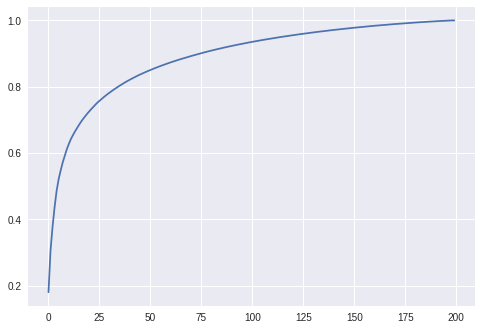

In [0]:
print(list_variance)
py.plot(range(0,200),list_variance/total_variance)

py.show()

#### Plotting for the Best K-Eigenvectors the satisfy 80% of the Total variance

In [0]:
total_variance = np.sum(eigenvalues)
print(total_variance)
list_variance = []
sum = 0
for i in range(0,1000):
  sum +=eigenvalues[i]
  list_variance.append(sum)
  if sum / total_variance >= 0.8 :
    k = i
    break    
print(k)
  

16008954.484349987
35


[2893368.0588590573, 4910618.416574601, 6058860.304557428, 7003032.6072588125, 7798393.723197779, 8358162.881510736, 8778396.492233226, 9164711.77040357, 9486420.371460458, 9795960.285038333, 10053437.154408015, 10285295.591317974, 10474089.905384514, 10651213.697619405, 10816223.12942997, 10972985.191038292, 11122787.033095196, 11260507.092983054, 11386352.64111964, 11508328.47820166, 11622509.490234004, 11733107.085824147, 11839946.797847861, 11943832.252358245, 12042487.000960577, 12128722.365216605, 12213561.441257155, 12297458.182603411, 12377099.420699496, 12456089.975729743, 12528190.206080101, 12599333.842118068, 12668724.964766152, 12736279.383236356, 12801377.872923553, 12865312.955068275]


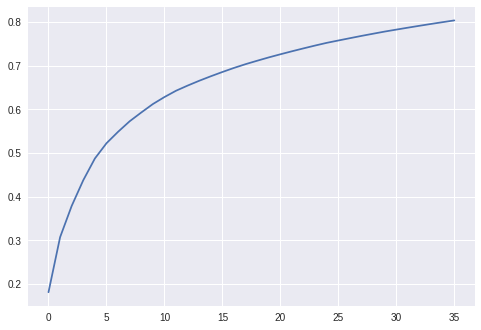

In [0]:
print(list_variance)
py.plot(range(0,k+1),list_variance/total_variance)

py.show()

##### There is a significant decrease in Eigenvalues after the 200th EigenValue

In [0]:
sumOfEigVal = 0
for e in eigenvalues:
  sumOfEigVal = sumOfEigVal + e

print(sumOfEigVal)  

16008954.48434999


In [0]:
Z_tesin - (npin - (np.mean(X_test,axis=0))
print(Z_tgxhrain.shape)


(200, 10304)


# The Classifiction part

alpha =  0.8
Projection matrix size =  (35, 10304)
Projection matrix =  [[-0.00281623 -0.00278538 -0.00255135 ... -0.0054346  -0.00555782
  -0.00628804]
 [ 0.01361156  0.01372372  0.01375542 ... -0.01151936 -0.01183526
  -0.01087738]
 [ 0.02055771  0.02051844  0.02030213 ...  0.01558413  0.01481205
   0.0152495 ]
 ...
 [-0.00564683 -0.00587944 -0.00678141 ... -0.00616466 -0.00370547
  -0.00425078]
 [ 0.00236301  0.00345136  0.00308693 ... -0.00739807 -0.00597593
  -0.00237366]
 [-0.01116022 -0.01193521 -0.01041702 ...  0.01140508  0.00894508
   0.00214362]]
Variance explained =  12801377.872923553

k =  1
-------
Accuracy: 
1.0
confusion matrix: 

Classification report: 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00     

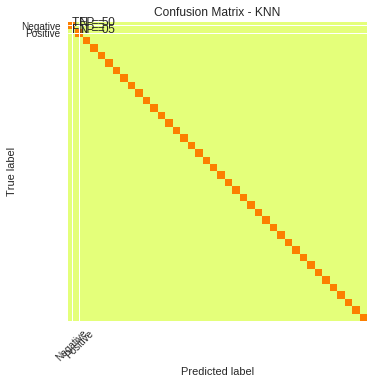


k =  3
-------
Accuracy: 
0.97
confusion matrix: 

Classification report: 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       0.71      1.00      0.83         5
           4       1.00      1.00      1.00         5
           5       0.83      1.00      0.91         5
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         5
          11       0.83      1.00      0.91         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         5
          16       1.00      1.00      1.00         5
    

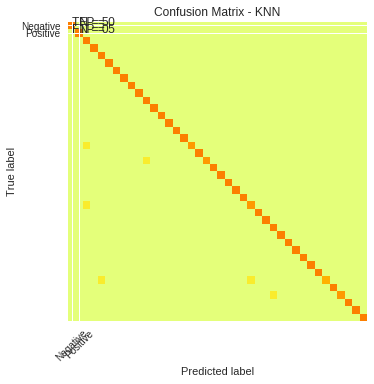


k =  5
-------
Accuracy: 
0.9
confusion matrix: 

Classification report: 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       0.71      1.00      0.83         5
           3       0.83      1.00      0.91         5
           4       1.00      1.00      1.00         5
           5       0.71      1.00      0.83         5
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         5
           9       1.00      0.80      0.89         5
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5
          13       0.83      1.00      0.91         5
          14       0.83      1.00      0.91         5
          15       0.50      0.60      0.55         5
          16       1.00      0.80      0.89         5
     

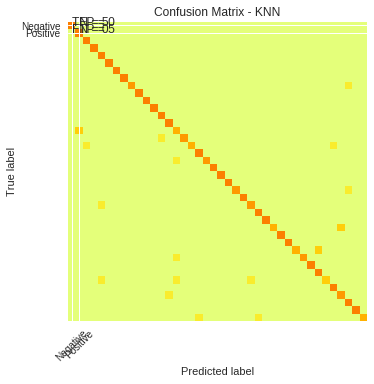


k =  7
-------
Accuracy: 
0.85
confusion matrix: 

Classification report: 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       0.62      1.00      0.77         5
           3       0.83      1.00      0.91         5
           4       0.83      1.00      0.91         5
           5       0.50      0.80      0.62         5
           6       1.00      1.00      1.00         5
           7       0.71      1.00      0.83         5
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         5
          11       0.83      1.00      0.91         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       0.80      0.80      0.80         5
          15       0.60      0.60      0.60         5
          16       1.00      1.00      1.00         5
    

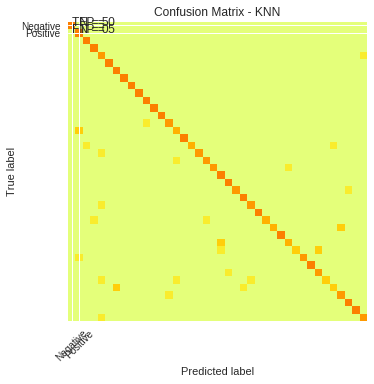

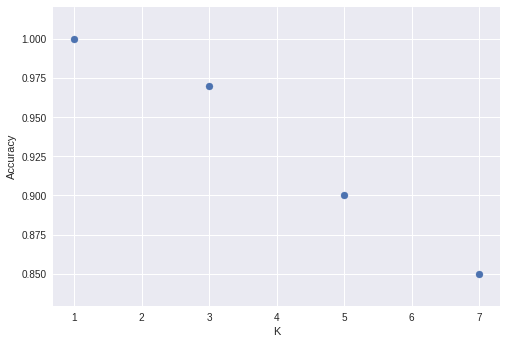

-------------------------------------------------------------------------------------------------------------

alpha =  0.85
Projection matrix size =  (50, 10304)
Projection matrix =  [[-0.00281623 -0.00278538 -0.00255135 ... -0.0054346  -0.00555782
  -0.00628804]
 [ 0.01361156  0.01372372  0.01375542 ... -0.01151936 -0.01183526
  -0.01087738]
 [ 0.02055771  0.02051844  0.02030213 ...  0.01558413  0.01481205
   0.0152495 ]
 ...
 [-0.0077105  -0.00655521 -0.00611502 ...  0.00715887  0.005068
   0.00167559]
 [-0.00635318 -0.0044173  -0.00420832 ...  0.01453131  0.01284369
   0.00929953]
 [ 0.00488859  0.00319341  0.00357969 ...  0.00541942  0.00152279
   0.00343359]]
Variance explained =  13576206.595285254

k =  1
-------
Accuracy: 
1.0
confusion matrix: 

Classification report: 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00   

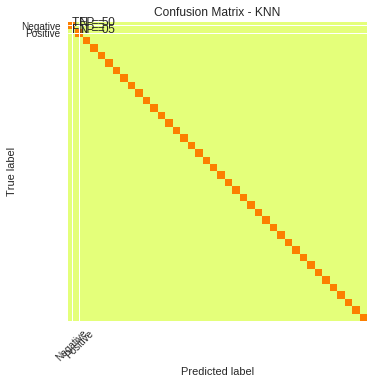


k =  3
-------
Accuracy: 
0.97
confusion matrix: 

Classification report: 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       0.71      1.00      0.83         5
           4       1.00      1.00      1.00         5
           5       0.83      1.00      0.91         5
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         5
          11       0.83      1.00      0.91         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       0.83      1.00      0.91         5
          15       1.00      1.00      1.00         5
          16       1.00      1.00      1.00         5
    

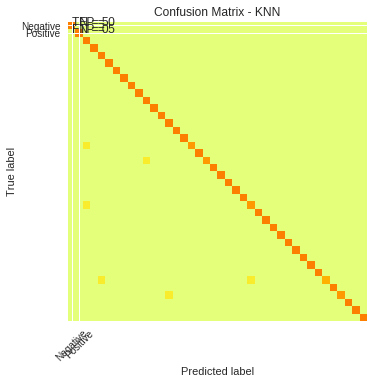


k =  5
-------
Accuracy: 
0.905
confusion matrix: 

Classification report: 

              precision    recall  f1-score   support

           1       0.83      1.00      0.91         5
           2       0.62      1.00      0.77         5
           3       0.80      0.80      0.80         5
           4       1.00      1.00      1.00         5
           5       0.62      1.00      0.77         5
           6       1.00      1.00      1.00         5
           7       0.83      1.00      0.91         5
           8       1.00      1.00      1.00         5
           9       1.00      0.80      0.89         5
          10       1.00      1.00      1.00         5
          11       1.00      0.80      0.89         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       0.83      1.00      0.91         5
          15       0.75      0.60      0.67         5
          16       1.00      1.00      1.00         5
   

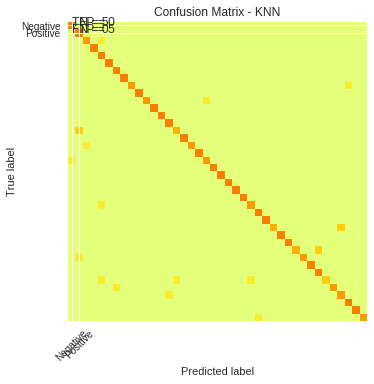


k =  7
-------
Accuracy: 
0.87
confusion matrix: 

Classification report: 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       0.62      1.00      0.77         5
           3       0.71      1.00      0.83         5
           4       0.83      1.00      0.91         5
           5       0.71      1.00      0.83         5
           6       1.00      1.00      1.00         5
           7       0.71      1.00      0.83         5
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         5
          11       0.83      1.00      0.91         5
          12       1.00      1.00      1.00         5
          13       0.83      1.00      0.91         5
          14       0.80      0.80      0.80         5
          15       0.75      0.60      0.67         5
          16       1.00      1.00      1.00         5
    

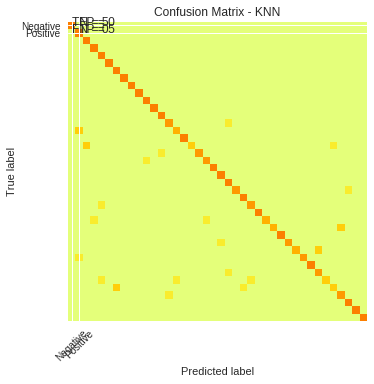

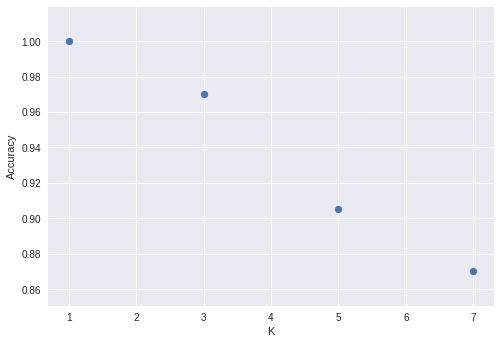

-------------------------------------------------------------------------------------------------------------

alpha =  0.9
Projection matrix size =  (75, 10304)
Projection matrix =  [[-0.00281623 -0.00278538 -0.00255135 ... -0.0054346  -0.00555782
  -0.00628804]
 [ 0.01361156  0.01372372  0.01375542 ... -0.01151936 -0.01183526
  -0.01087738]
 [ 0.02055771  0.02051844  0.02030213 ...  0.01558413  0.01481205
   0.0152495 ]
 ...
 [ 0.00114257  0.00514289  0.00129522 ... -0.00602974 -0.00280697
   0.00319379]
 [-0.00340426 -0.00211831  0.00021261 ...  0.00063042 -0.00470308
  -0.01446144]
 [ 0.005782    0.00363193  0.00515784 ...  0.00641991  0.00036715
  -0.00679198]]
Variance explained =  14401863.376776185

k =  1
-------
Accuracy: 
1.0
confusion matrix: 

Classification report: 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00  

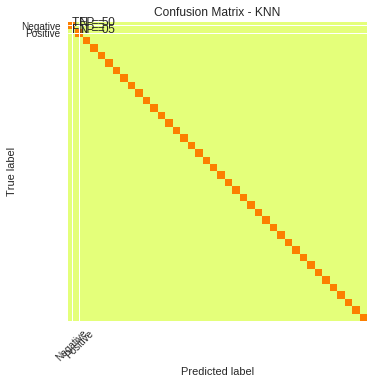


k =  3
-------
Accuracy: 
0.97
confusion matrix: 

Classification report: 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       0.83      1.00      0.91         5
           3       0.71      1.00      0.83         5
           4       1.00      1.00      1.00         5
           5       0.83      1.00      0.91         5
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       0.83      1.00      0.91         5
          15       1.00      1.00      1.00         5
          16       1.00      1.00      1.00         5
    

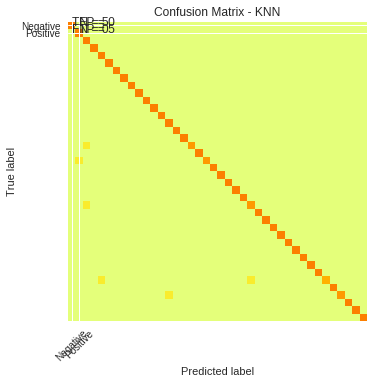


k =  5
-------
Accuracy: 
0.88
confusion matrix: 

Classification report: 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       0.83      1.00      0.91         5
           3       0.67      0.80      0.73         5
           4       0.83      1.00      0.91         5
           5       0.56      1.00      0.71         5
           6       1.00      1.00      1.00         5
           7       0.71      1.00      0.83         5
           8       1.00      1.00      1.00         5
           9       1.00      0.80      0.89         5
          10       1.00      1.00      1.00         5
          11       1.00      0.80      0.89         5
          12       1.00      1.00      1.00         5
          13       0.83      1.00      0.91         5
          14       0.83      1.00      0.91         5
          15       0.57      0.80      0.67         5
          16       1.00      0.80      0.89         5
    

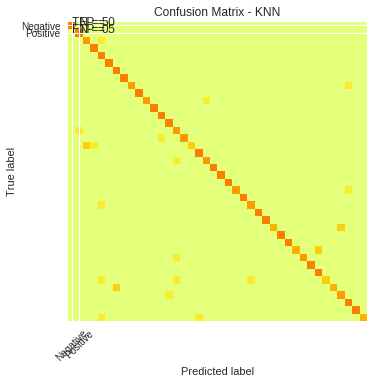


k =  7
-------
Accuracy: 
0.86
confusion matrix: 

Classification report: 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       0.56      1.00      0.71         5
           3       0.71      1.00      0.83         5
           4       0.83      1.00      0.91         5
           5       0.71      1.00      0.83         5
           6       1.00      1.00      1.00         5
           7       0.62      1.00      0.77         5
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         5
          11       0.83      1.00      0.91         5
          12       1.00      1.00      1.00         5
          13       0.83      1.00      0.91         5
          14       0.80      0.80      0.80         5
          15       0.75      0.60      0.67         5
          16       1.00      0.80      0.89         5
    

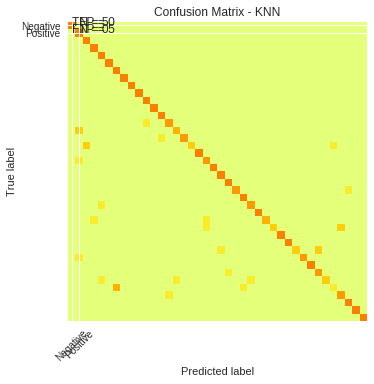

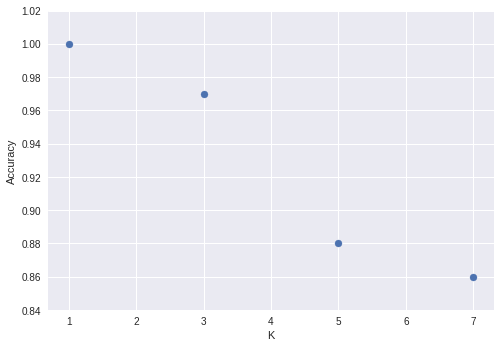

-------------------------------------------------------------------------------------------------------------

alpha =  0.95
Projection matrix size =  (114, 10304)
Projection matrix =  [[-0.00281623 -0.00278538 -0.00255135 ... -0.0054346  -0.00555782
  -0.00628804]
 [ 0.01361156  0.01372372  0.01375542 ... -0.01151936 -0.01183526
  -0.01087738]
 [ 0.02055771  0.02051844  0.02030213 ...  0.01558413  0.01481205
   0.0152495 ]
 ...
 [ 0.00095837  0.00341657 -0.00072188 ... -0.00567624 -0.01473127
  -0.0177768 ]
 [ 0.00490116  0.00390615  0.0067452  ... -0.00876877  0.00033084
  -0.00113636]
 [-0.01088026 -0.01174008 -0.00669636 ...  0.0078182   0.00035518
  -0.00048038]]
Variance explained =  15194577.130006738

k =  1
-------
Accuracy: 
1.0
confusion matrix: 

Classification report: 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00

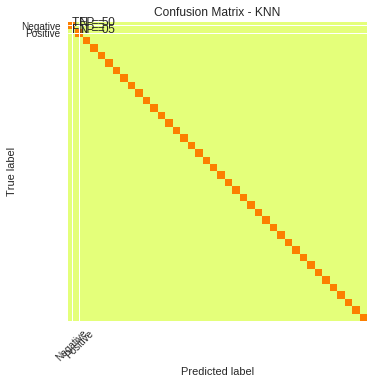


k =  3
-------
Accuracy: 
0.965
confusion matrix: 

Classification report: 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       0.83      1.00      0.91         5
           3       0.83      1.00      0.91         5
           4       1.00      1.00      1.00         5
           5       0.71      1.00      0.83         5
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         5
          15       0.83      1.00      0.91         5
          16       1.00      1.00      1.00         5
   

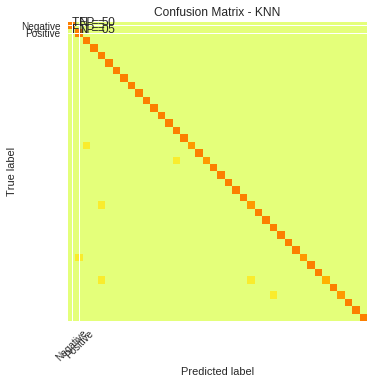


k =  5
-------
Accuracy: 
0.88
confusion matrix: 

Classification report: 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       0.80      0.80      0.80         5
           4       0.83      1.00      0.91         5
           5       0.56      1.00      0.71         5
           6       1.00      1.00      1.00         5
           7       0.62      1.00      0.77         5
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         5
          11       1.00      0.80      0.89         5
          12       1.00      1.00      1.00         5
          13       0.83      1.00      0.91         5
          14       1.00      1.00      1.00         5
          15       0.62      1.00      0.77         5
          16       1.00      0.80      0.89         5
    

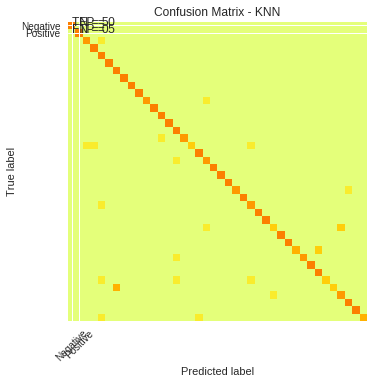


k =  7
-------
Accuracy: 
0.86
confusion matrix: 

Classification report: 

              precision    recall  f1-score   support

           1       0.83      1.00      0.91         5
           2       0.71      1.00      0.83         5
           3       0.83      1.00      0.91         5
           4       0.83      1.00      0.91         5
           5       0.56      1.00      0.71         5
           6       1.00      1.00      1.00         5
           7       0.62      1.00      0.77         5
           8       1.00      1.00      1.00         5
           9       0.83      1.00      0.91         5
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       0.80      0.80      0.80         5
          15       0.67      0.80      0.73         5
          16       1.00      0.80      0.89         5
    

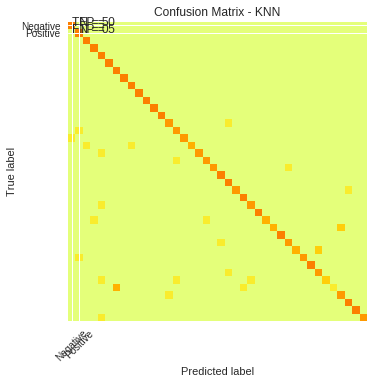

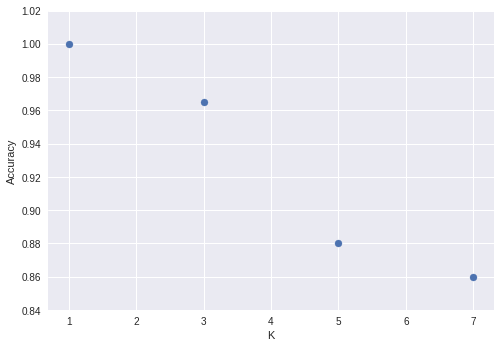

-------------------------------------------------------------------------------------------------------------



In [0]:
from matplotlib import pyplot as pyplt
alpha = [0.8, 0.85, 0.9, 0.95]
accuracy_list =we []
for a in alpha:
  reqSumOfEigVal = a*sumOfEigVal
  j = 0
  sum = 0
  p = []
  while sum + eigPairs[j][0] < reqSumOfEigVal:
    p.append( eigPairs[j][1] )
    sum = sum + eigPairs[j][0]
    j = j + 1
  p = np.array(p) 
  print('alpha = ', a)
  print('Projection matrix size = ', p.shape)
  print('Projection matrix = ', p)
  print('Variance explained = ', sum)
  
  
  Z_train_projected = np.dot(p, Z_train.T)
  Z_test_projected = np.dot(p, Z_test.T)
  
  accuracy = np.ones((4,1))
  K = [1, 3, 5, 7]
  for k in K:
    print('\nk = ', k)
    print('-------')
    
    from sklearn.neighbors import KNeighborsClassifier
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(Z_train_projected.T, Y_train)
  
    Y_pred = clf.predict(Z_test_projected.T)

    from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
    print('Accuracy: ')
    accuracy2 = accuracy_score(Y_test, Y_pred)
    accuracy_list.append(accuracy2)
    print(accuracy2)
    accuracy[K.index(k)] = accuracy_score(Y_test, Y_pred)
    print('confusion matrix: \n')
    #print(confusion_matrix(Y_test, Y_pred))
    print('Classification report: \n')
    print(classification_report(Y_test, Y_pred))
    ## Plotting the Confusion Matrix
    cm = confusion_matrix(Y_test, Y_pred)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative', 'Positive']
    plt.title('Confusion Matrix - KNN')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN', 'FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j, i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()
  
  K = np.array(K)
  pyplt.scatter(K, accuracy)
  pyplt.xlabel('K')
  pyplt.ylabel('Accuracy')
  pyplt.show()
  print('-------------------------------------------------------------------------------------------------------------\n')
  

#### PLotting Accuracy vs K vs Alpha

No handles with labels found to put in legend.


[1 3 5 7]
[0.94, 0.895, 0.845, 0.74, 0.94, 0.895, 0.845, 0.74, 0.94, 0.895, 0.845, 0.74, 0.94, 0.895, 0.845, 0.74]
[0.8, 0.85, 0.9, 0.95]


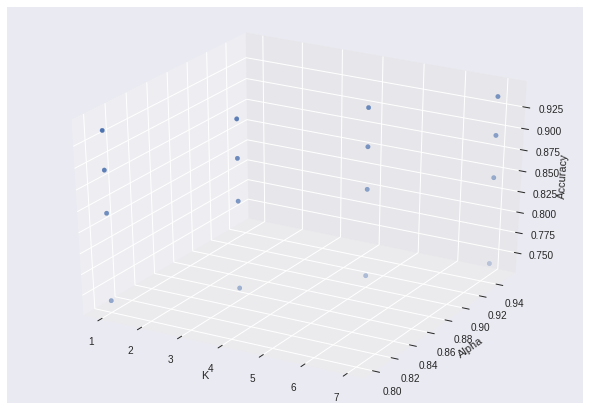

In [0]:

from mpl_toolkits.mplot3d import Axes3D
import itertools
print(K)
print(accuracy_list)
print(alpha)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(xs=list(itertools.chain.from_iterable(itertools.repeat(x, 4) for x in K)), ys=list(itertools.chain.from_iterable(itertools.repeat(x, 4) for x in alpha)), zs =accuracy_list,zdir = 'z' )
ax.legend()
ax.set_xlabel('K')
ax.set_ylabel('Alpha')
ax.set_zlabel('Accuracy')

#pyplt.plot(K, np.array(accuracy_list))
plt.show()

### Repeating the Classification using CrossValidation with 5-folds

alpha =  0.8
Projection matrix size =  (35, 10304)
Projection matrix =  [[-0.00281623 -0.00278538 -0.00255135 ... -0.0054346  -0.00555782
  -0.00628804]
 [ 0.01361156  0.01372372  0.01375542 ... -0.01151936 -0.01183526
  -0.01087738]
 [ 0.02055771  0.02051844  0.02030213 ...  0.01558413  0.01481205
   0.0152495 ]
 ...
 [-0.00564683 -0.00587944 -0.00678141 ... -0.00616466 -0.00370547
  -0.00425078]
 [ 0.00236301  0.00345136  0.00308693 ... -0.00739807 -0.00597593
  -0.00237366]
 [-0.01116022 -0.01193521 -0.01041702 ...  0.01140508  0.00894508
   0.00214362]]
Variance explained =  12801377.872923553

k =  1
-------
Training corssValidation Accuracy_score: 0.95 (+/- 0.06)
Accuracy: 
1.0
confusion matrix: 

Classification report: 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00  

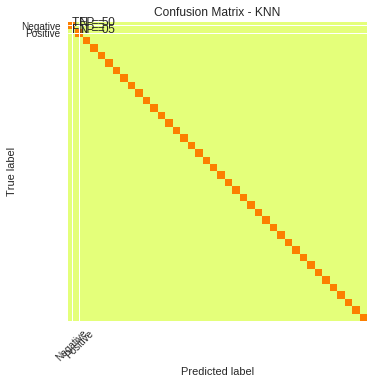


k =  3
-------
Training corssValidation Accuracy_score: 0.88 (+/- 0.06)
Accuracy: 
0.97
confusion matrix: 

Classification report: 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       0.71      1.00      0.83         5
           4       1.00      1.00      1.00         5
           5       0.83      1.00      0.91         5
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         5
          11       0.83      1.00      0.91         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         5
 

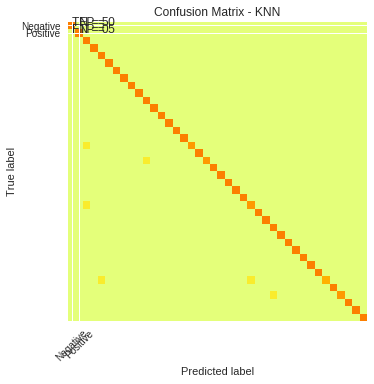


k =  5
-------
Training corssValidation Accuracy_score: 0.78 (+/- 0.07)
Accuracy: 
0.9
confusion matrix: 

Classification report: 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       0.71      1.00      0.83         5
           3       0.83      1.00      0.91         5
           4       1.00      1.00      1.00         5
           5       0.71      1.00      0.83         5
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         5
           9       1.00      0.80      0.89         5
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5
          13       0.83      1.00      0.91         5
          14       0.83      1.00      0.91         5
          15       0.50      0.60      0.55         5
  

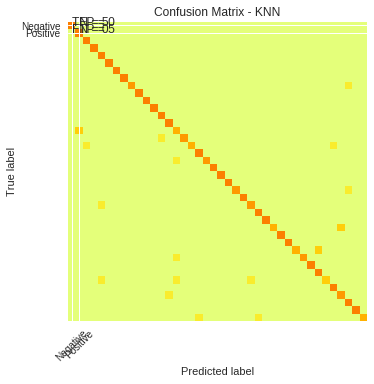


k =  7
-------
Training corssValidation Accuracy_score: 0.77 (+/- 0.09)
Accuracy: 
0.85
confusion matrix: 

Classification report: 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       0.62      1.00      0.77         5
           3       0.83      1.00      0.91         5
           4       0.83      1.00      0.91         5
           5       0.50      0.80      0.62         5
           6       1.00      1.00      1.00         5
           7       0.71      1.00      0.83         5
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         5
          11       0.83      1.00      0.91         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       0.80      0.80      0.80         5
          15       0.60      0.60      0.60         5
 

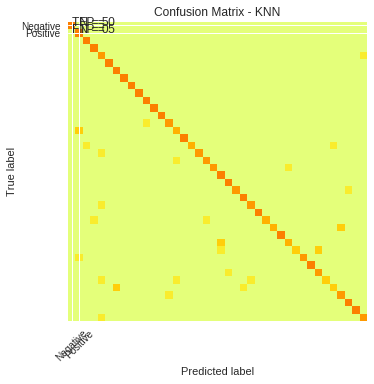

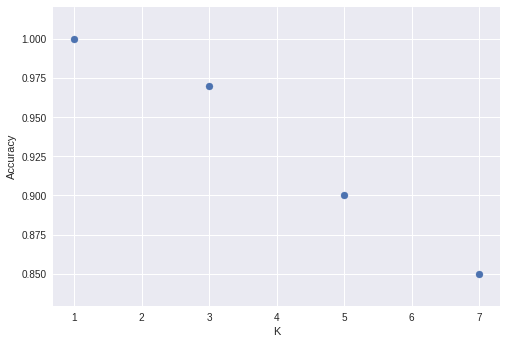

-------------------------------------------------------------------------------------------------------------

alpha =  0.85
Projection matrix size =  (50, 10304)
Projection matrix =  [[-0.00281623 -0.00278538 -0.00255135 ... -0.0054346  -0.00555782
  -0.00628804]
 [ 0.01361156  0.01372372  0.01375542 ... -0.01151936 -0.01183526
  -0.01087738]
 [ 0.02055771  0.02051844  0.02030213 ...  0.01558413  0.01481205
   0.0152495 ]
 ...
 [-0.0077105  -0.00655521 -0.00611502 ...  0.00715887  0.005068
   0.00167559]
 [-0.00635318 -0.0044173  -0.00420832 ...  0.01453131  0.01284369
   0.00929953]
 [ 0.00488859  0.00319341  0.00357969 ...  0.00541942  0.00152279
   0.00343359]]
Variance explained =  13576206.595285254

k =  1
-------
Training corssValidation Accuracy_score: 0.94 (+/- 0.05)
Accuracy: 
1.0
confusion matrix: 

Classification report: 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00

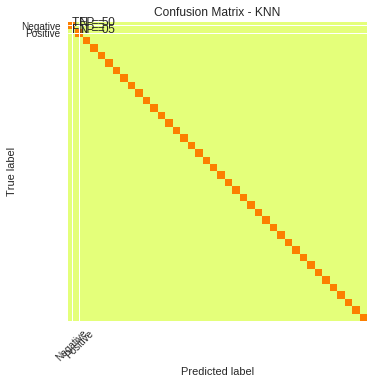


k =  3
-------
Training corssValidation Accuracy_score: 0.88 (+/- 0.07)
Accuracy: 
0.97
confusion matrix: 

Classification report: 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       0.71      1.00      0.83         5
           4       1.00      1.00      1.00         5
           5       0.83      1.00      0.91         5
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         5
          11       0.83      1.00      0.91         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       0.83      1.00      0.91         5
          15       1.00      1.00      1.00         5
 

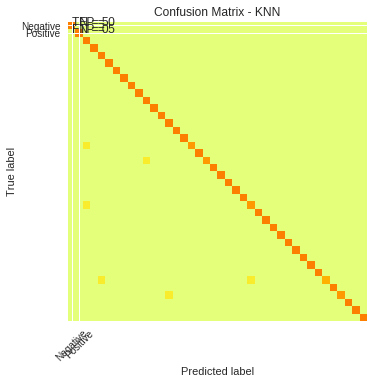


k =  5
-------
Training corssValidation Accuracy_score: 0.79 (+/- 0.04)
Accuracy: 
0.905
confusion matrix: 

Classification report: 

              precision    recall  f1-score   support

           1       0.83      1.00      0.91         5
           2       0.62      1.00      0.77         5
           3       0.80      0.80      0.80         5
           4       1.00      1.00      1.00         5
           5       0.62      1.00      0.77         5
           6       1.00      1.00      1.00         5
           7       0.83      1.00      0.91         5
           8       1.00      1.00      1.00         5
           9       1.00      0.80      0.89         5
          10       1.00      1.00      1.00         5
          11       1.00      0.80      0.89         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       0.83      1.00      0.91         5
          15       0.75      0.60      0.67         5


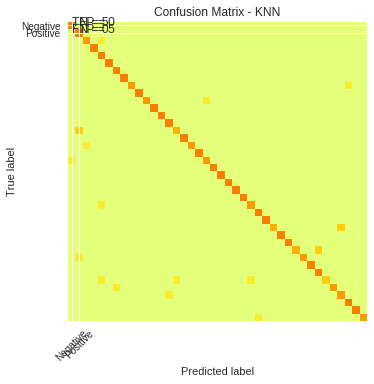


k =  7
-------
Training corssValidation Accuracy_score: 0.75 (+/- 0.13)
Accuracy: 
0.87
confusion matrix: 

Classification report: 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       0.62      1.00      0.77         5
           3       0.71      1.00      0.83         5
           4       0.83      1.00      0.91         5
           5       0.71      1.00      0.83         5
           6       1.00      1.00      1.00         5
           7       0.71      1.00      0.83         5
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         5
          11       0.83      1.00      0.91         5
          12       1.00      1.00      1.00         5
          13       0.83      1.00      0.91         5
          14       0.80      0.80      0.80         5
          15       0.75      0.60      0.67         5
 

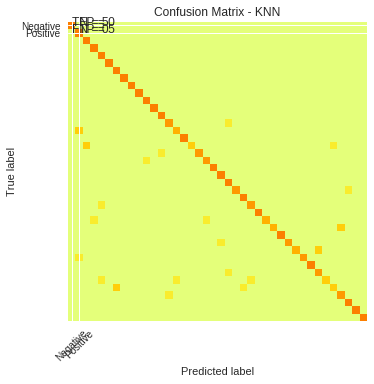

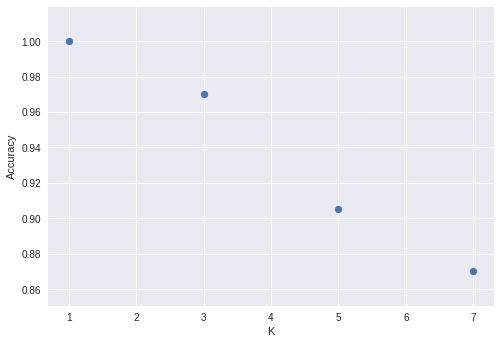

-------------------------------------------------------------------------------------------------------------

alpha =  0.9
Projection matrix size =  (75, 10304)
Projection matrix =  [[-0.00281623 -0.00278538 -0.00255135 ... -0.0054346  -0.00555782
  -0.00628804]
 [ 0.01361156  0.01372372  0.01375542 ... -0.01151936 -0.01183526
  -0.01087738]
 [ 0.02055771  0.02051844  0.02030213 ...  0.01558413  0.01481205
   0.0152495 ]
 ...
 [ 0.00114257  0.00514289  0.00129522 ... -0.00602974 -0.00280697
   0.00319379]
 [-0.00340426 -0.00211831  0.00021261 ...  0.00063042 -0.00470308
  -0.01446144]
 [ 0.005782    0.00363193  0.00515784 ...  0.00641991  0.00036715
  -0.00679198]]
Variance explained =  14401863.376776185

k =  1
-------
Training corssValidation Accuracy_score: 0.94 (+/- 0.05)
Accuracy: 
1.0
confusion matrix: 

Classification report: 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.0

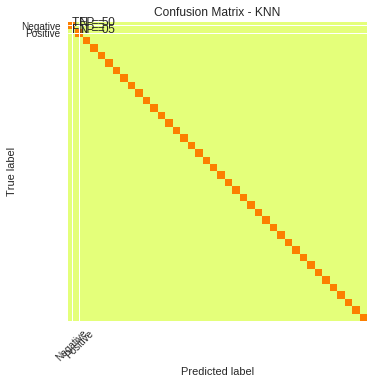


k =  3
-------
Training corssValidation Accuracy_score: 0.86 (+/- 0.09)
Accuracy: 
0.97
confusion matrix: 

Classification report: 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       0.83      1.00      0.91         5
           3       0.71      1.00      0.83         5
           4       1.00      1.00      1.00         5
           5       0.83      1.00      0.91         5
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       0.83      1.00      0.91         5
          15       1.00      1.00      1.00         5
 

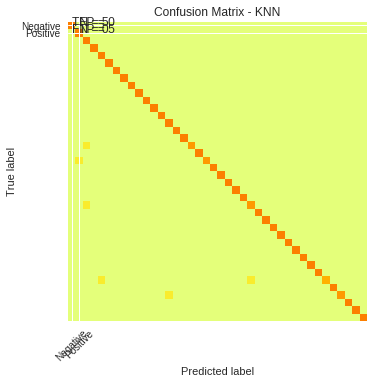


k =  5
-------
Training corssValidation Accuracy_score: 0.77 (+/- 0.06)
Accuracy: 
0.88
confusion matrix: 

Classification report: 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       0.83      1.00      0.91         5
           3       0.67      0.80      0.73         5
           4       0.83      1.00      0.91         5
           5       0.56      1.00      0.71         5
           6       1.00      1.00      1.00         5
           7       0.71      1.00      0.83         5
           8       1.00      1.00      1.00         5
           9       1.00      0.80      0.89         5
          10       1.00      1.00      1.00         5
          11       1.00      0.80      0.89         5
          12       1.00      1.00      1.00         5
          13       0.83      1.00      0.91         5
          14       0.83      1.00      0.91         5
          15       0.57      0.80      0.67         5
 

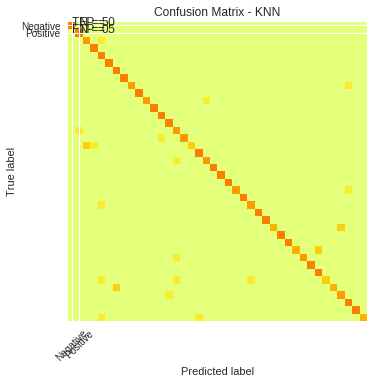


k =  7
-------
Training corssValidation Accuracy_score: 0.74 (+/- 0.15)
Accuracy: 
0.86
confusion matrix: 

Classification report: 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       0.56      1.00      0.71         5
           3       0.71      1.00      0.83         5
           4       0.83      1.00      0.91         5
           5       0.71      1.00      0.83         5
           6       1.00      1.00      1.00         5
           7       0.62      1.00      0.77         5
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         5
          11       0.83      1.00      0.91         5
          12       1.00      1.00      1.00         5
          13       0.83      1.00      0.91         5
          14       0.80      0.80      0.80         5
          15       0.75      0.60      0.67         5
 

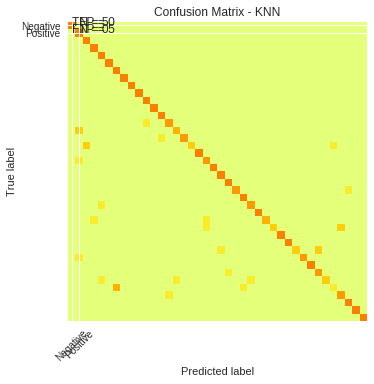

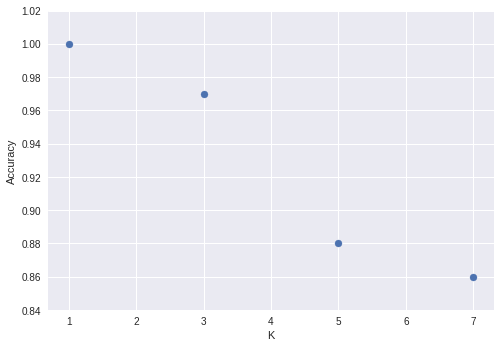

-------------------------------------------------------------------------------------------------------------

alpha =  0.95
Projection matrix size =  (114, 10304)
Projection matrix =  [[-0.00281623 -0.00278538 -0.00255135 ... -0.0054346  -0.00555782
  -0.00628804]
 [ 0.01361156  0.01372372  0.01375542 ... -0.01151936 -0.01183526
  -0.01087738]
 [ 0.02055771  0.02051844  0.02030213 ...  0.01558413  0.01481205
   0.0152495 ]
 ...
 [ 0.00095837  0.00341657 -0.00072188 ... -0.00567624 -0.01473127
  -0.0177768 ]
 [ 0.00490116  0.00390615  0.0067452  ... -0.00876877  0.00033084
  -0.00113636]
 [-0.01088026 -0.01174008 -0.00669636 ...  0.0078182   0.00035518
  -0.00048038]]
Variance explained =  15194577.130006738

k =  1
-------
Training corssValidation Accuracy_score: 0.93 (+/- 0.06)
Accuracy: 
1.0
confusion matrix: 

Classification report: 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1

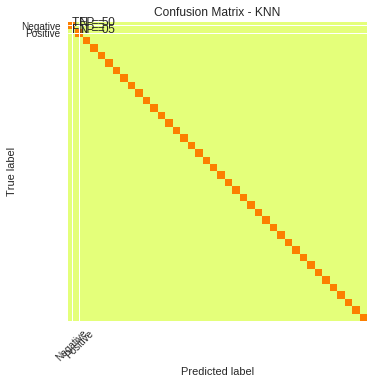


k =  3
-------
Training corssValidation Accuracy_score: 0.84 (+/- 0.10)
Accuracy: 
0.965
confusion matrix: 

Classification report: 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       0.83      1.00      0.91         5
           3       0.83      1.00      0.91         5
           4       1.00      1.00      1.00         5
           5       0.71      1.00      0.83         5
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         5
          15       0.83      1.00      0.91         5


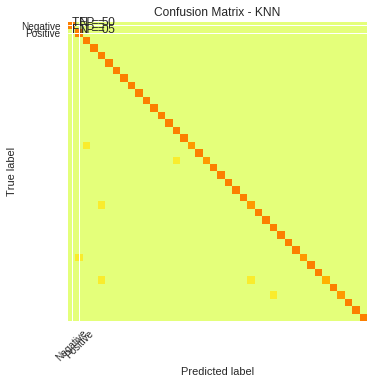


k =  5
-------
Training corssValidation Accuracy_score: 0.77 (+/- 0.06)
Accuracy: 
0.88
confusion matrix: 

Classification report: 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       0.80      0.80      0.80         5
           4       0.83      1.00      0.91         5
           5       0.56      1.00      0.71         5
           6       1.00      1.00      1.00         5
           7       0.62      1.00      0.77         5
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         5
          11       1.00      0.80      0.89         5
          12       1.00      1.00      1.00         5
          13       0.83      1.00      0.91         5
          14       1.00      1.00      1.00         5
          15       0.62      1.00      0.77         5
 

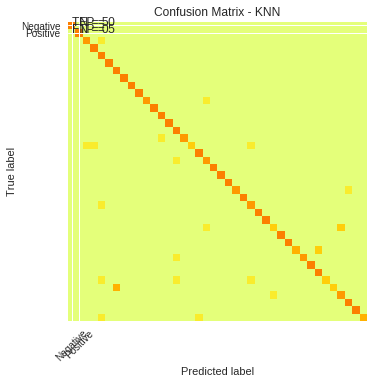


k =  7
-------
Training corssValidation Accuracy_score: 0.74 (+/- 0.08)
Accuracy: 
0.86
confusion matrix: 

Classification report: 

              precision    recall  f1-score   support

           1       0.83      1.00      0.91         5
           2       0.71      1.00      0.83         5
           3       0.83      1.00      0.91         5
           4       0.83      1.00      0.91         5
           5       0.56      1.00      0.71         5
           6       1.00      1.00      1.00         5
           7       0.62      1.00      0.77         5
           8       1.00      1.00      1.00         5
           9       0.83      1.00      0.91         5
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       0.80      0.80      0.80         5
          15       0.67      0.80      0.73         5
 

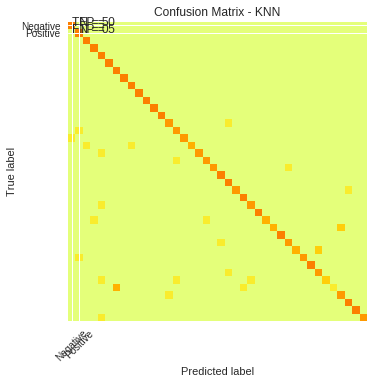

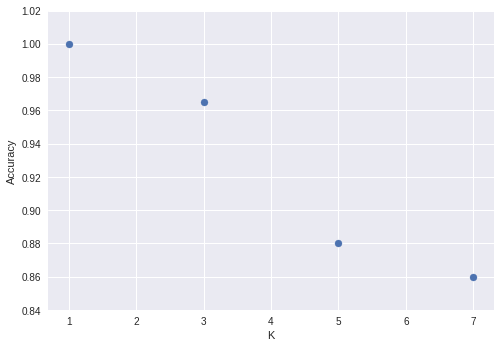

-------------------------------------------------------------------------------------------------------------



In [0]:
from sklearn.model_selection import cross_val_score
alpha = [0.8, 0.85, 0.9, 0.95]
accuracy_list = []
for a in alpha:
  reqSumOfEigVal = a*sumOfEigVal
  j = 0
  sum = 0
  p = []
  while sum + eigPairs[j][0] < reqSumOfEigVal:
    p.append( eigPairs[j][1] )
    sum = sum + eigPairs[j][0]
    j = j + 1
  p = np.array(p) 
  print('alpha = ', a)
  print('Projection matrix size = ', p.shape)
  print('Projection matrix = ', p)
  print('Variance explained = ', sum)
  
  
  Z_train_projected = np.dot(p, Z_train.T)
  Z_test_projected = np.dot(p, Z_test.T)
  
  accuracy = np.ones((4,1))
  K = [1, 3, 5, 7]
  for k in K:
    print('\nk = ', k)
    print('-------')
    
    
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(Z_train_projected.T, Y_train)
    scores = cross_val_score(clf, Z_train_projected.T, Y_train, cv=5)
    print("Training corssValidation Accuracy_score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    
    Y_pred = clf.predict(Z_test_projected.T)

    
    print('Accuracy: ')
    accuracy2 = accuracy_score(Y_test, Y_pred)
    accuracy_list.append(accuracy2)
    print(accuracy2)
    accuracy[K.index(k)] = accuracy_score(Y_test, Y_pred)
    print('confusion matrix: \n')
    #print(confusion_matrix(Y_test, Y_pred))
    print('Classification report: \n')
    print(classification_report(Y_test, Y_pred))
    ## Plotting the Confusion Matrix
    cm = confusion_matrix(Y_test, Y_pred)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative', 'Positive']
    plt.title('Confusion Matrix - KNN')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN', 'FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j, i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()
  
  K = np.array(K)
  pyplt.scatter(K, accuracy)
  pyplt.xlabel('K')
  pyplt.ylabel('Accuracy')
  pyplt.show()
  print('-------------------------------------------------------------------------------------------------------------\n')
  